<a href="https://colab.research.google.com/github/Egg-Lord/CCMACLRL_EXERCISES_COM232/blob/main/Copy_of_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [ ]:
df = pd.read_csv('Exercise1ml.csv')
df.head()

,Name,Post/Shares Frequency,Active,# of friends/followers,Personality
0,Mark,1,1,1587,1
1,Xen,0,0,926,0
2,Carlxen,1,1,412,1
3,Brieyl,1,1,1375,1
4,Mae,0,0,689,0


Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    49 non-null     object
 1   Post/Shares Frequency   49 non-null     int64 
 2   Active                  49 non-null     int64 
 3   # of friends/followers  49 non-null     int64 
 4   Personality             49 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.0+ KB


Display the total number of samples from each label using `.value_counts()`

In [ ]:
df.value_counts()

,,,,,count
Name,Post/Shares Frequency,Active,# of friends/followers,Personality,
Adrian,1,1,1420,1,1
Alanna,1,1,834,1,1
Alyssa,0,0,1371,0,1
Bianca,0,0,128,0,1
Brandon,0,0,1931,0,1
Brieyl,1,1,1375,1,1
Camille,0,0,395,0,1
Carlxen,1,1,412,1,1
Christian,1,1,1062,1,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

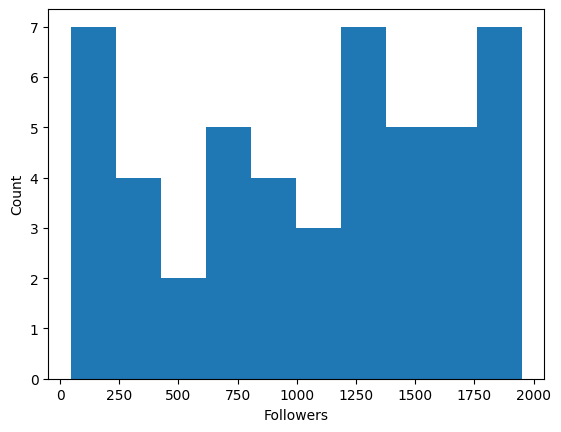

In [ ]:
plt.hist(df["# of friends/followers"])
plt.xlabel("Followers")
plt.ylabel("Count")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
df.drop(columns='Name', inplace=True)
y = df['Personality'].values



Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(39, 4)
(39,)
(10, 4)
(10,)


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


Display the dimensions of each variables using `.shape()`

> Add blockquote



X_train shape: (39, 4)
X_test shape: (10, 4)
y_train shape: (39,)
y_test shape: (10,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:

knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [ ]:

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [ ]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

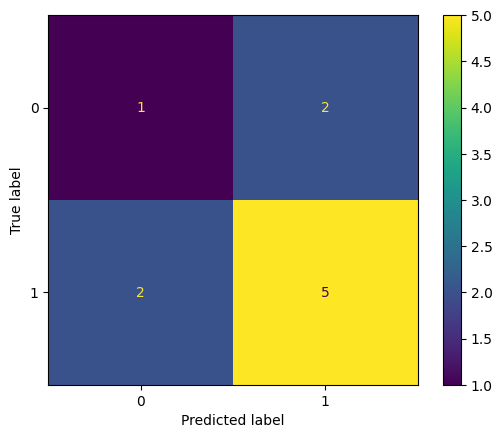

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [ ]:

metrics.accuracy_score(y_test, y_pred)

0.6

Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.33333333 0.71428571]


Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.33333333 0.71428571]


Display the f1-score

In [ ]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.33333333 0.71428571]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [ ]:
knn.predict([[6, 3, 4, 2]])

array([0])